In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt

import copy

In [2]:
#%matplotlib notebook

In [3]:
class cube_visualizer:
    #hardcoded he colors of the rubik cube
    color=[
        "#fefefe", #white
        "#ff0000", #red
        "#0000ff", #blue
        "#ffa500", #orange
        "#00ff00", #green
        "#ffff00" #yellow
    ]
    
    def add_surface(ax,x,y,z,direction,rgba): #helper function to add flat surface (with color) on a mathplotlib graph
        #(x,y,z) coordinate of origin of the surface
        #direction:
        #    0 - xy
        #    1 - yz
        #    2 - xz

        p1=np.array([[0,0],[1,1]])
        p2=np.array([[0,1],[0,1]])
        d=np.array([[0,0],[0,0]])

        if (direction==0):
            ax.plot_surface(p1+x,p2+y,d+z,color=rgba)
        elif (direction==1):
            ax.plot_surface(d+x,p1+y,p2+z,color=rgba)
        else :
            ax.plot_surface(p1+x,d+y,p2+z,color=rgba)
            
    def plot_cube(ax,colors):
        #U
        cube_visualizer.add_surface(ax,0,1,2,0,cube_visualizer.color[colors[0][0]])
        cube_visualizer.add_surface(ax,1,1,2,0,cube_visualizer.color[colors[0][1]])
        cube_visualizer.add_surface(ax,1,0,2,0,cube_visualizer.color[colors[0][2]])
        cube_visualizer.add_surface(ax,0,0,2,0,cube_visualizer.color[colors[0][3]])
        
        #L
        cube_visualizer.add_surface(ax,0,1,1,1,cube_visualizer.color[colors[1][0]])
        cube_visualizer.add_surface(ax,0,0,1,1,cube_visualizer.color[colors[1][1]])
        cube_visualizer.add_surface(ax,0,0,0,1,cube_visualizer.color[colors[1][2]])
        cube_visualizer.add_surface(ax,0,1,0,1,cube_visualizer.color[colors[1][3]])
        
        #F
        cube_visualizer.add_surface(ax,0,0,1,2,cube_visualizer.color[colors[2][0]])
        cube_visualizer.add_surface(ax,1,0,1,2,cube_visualizer.color[colors[2][1]])
        cube_visualizer.add_surface(ax,1,0,0,2,cube_visualizer.color[colors[2][2]])
        cube_visualizer.add_surface(ax,0,0,0,2,cube_visualizer.color[colors[2][3]])
        
        #R
        cube_visualizer.add_surface(ax,2,0,1,1,cube_visualizer.color[colors[3][0]])
        cube_visualizer.add_surface(ax,2,1,1,1,cube_visualizer.color[colors[3][1]])
        cube_visualizer.add_surface(ax,2,1,0,1,cube_visualizer.color[colors[3][2]])
        cube_visualizer.add_surface(ax,2,0,0,1,cube_visualizer.color[colors[3][3]])
        
        #B
        cube_visualizer.add_surface(ax,1,2,1,2,cube_visualizer.color[colors[4][0]])
        cube_visualizer.add_surface(ax,0,2,1,2,cube_visualizer.color[colors[4][1]])
        cube_visualizer.add_surface(ax,0,2,0,2,cube_visualizer.color[colors[4][2]])
        cube_visualizer.add_surface(ax,1,2,0,2,cube_visualizer.color[colors[4][3]])
        
        #D
        cube_visualizer.add_surface(ax,0,0,0,0,cube_visualizer.color[colors[5][0]])
        cube_visualizer.add_surface(ax,1,0,0,0,cube_visualizer.color[colors[5][1]])
        cube_visualizer.add_surface(ax,1,1,0,0,cube_visualizer.color[colors[5][2]])
        cube_visualizer.add_surface(ax,0,1,0,0,cube_visualizer.color[colors[5][3]])
            
    def default_cube(): #just to test the color scheme on a 1x1x1 cube
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        cube_visualizer.add_surface(ax,0,0,1,0,cube_visualizer.color[0])
        cube_visualizer.add_surface(ax,0,0,0,1,cube_visualizer.color[1])
        cube_visualizer.add_surface(ax,0,0,0,2,cube_visualizer.color[2])
        cube_visualizer.add_surface(ax,1,0,0,1,cube_visualizer.color[3])
        cube_visualizer.add_surface(ax,0,1,0,2,cube_visualizer.color[4])
        cube_visualizer.add_surface(ax,0,0,0,0,cube_visualizer.color[5])

        plt.axis("off")

        plt.show()

In [4]:
class cube: #the class to represent the state of a cube
    #each sticker of the cube will be represented as a number and stored in a 6x4 array
    
    #faces
    #   0          U
    # 1 2 3 4    L F R B
    #   5          D
    
    #stickers
    #      0 1
    #      3 2
    #  4 5 8 9 12 13 16 17
    #  7 6 11 10 15 14 19 18
    #      20 21
    #      23 22
    
    #map the sticker to a color (color is defined in cube_visualizer)
    color_scheme=[0]*4+[1]*4+[2]*4+[3]*4+[4]*4+[5]*4
    
    def __init__ (self): # create
        self.arr=[
            [0,1,2,3],
            [4,5,6,7],
            [8,9,10,11],
            [12,13,14,15],
            [16,17,18,19],
            [20,21,22,23]
        ]
        
    def get_colors(self):
        col=copy.deepcopy(self.arr)
        for i in range(6):
            for j in range(4):
                col[i][j]=cube.color_scheme[col[i][j]]
                
        return col
    
    #helper function to rotate stickers
    def rotate(self,tup):
        for i in range(len(tup)-2,-1,-1):
            self.arr[tup[i][0]][tup[i][1]],self.arr[tup[i+1][0]][tup[i+1][1]]=self.arr[tup[i+1][0]][tup[i+1][1]],self.arr[tup[i][0]][tup[i][1]]
    
    #define the allowed moves (using quarter turn metric)
    def U(self):
        self.rotate([(0,0),(0,1),(0,2),(0,3)])
        self.rotate([(4,0),(3,0),(2,0),(1,0)])
        self.rotate([(4,1),(3,1),(2,1),(1,1)])
        
    def Up(self):
        U()
        U()
        U()
    

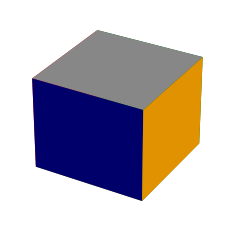

In [5]:
cube_visualizer.default_cube()

In [6]:
c=cube()
c.U()
c.arr

[[3, 0, 1, 2],
 [8, 9, 6, 7],
 [12, 13, 10, 11],
 [16, 17, 14, 15],
 [4, 5, 18, 19],
 [20, 21, 22, 23]]

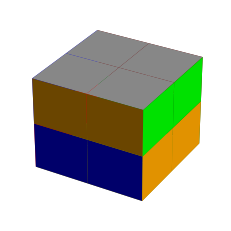

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cube_visualizer.plot_cube(ax,c.get_colors())

plt.axis("off")

plt.show()

In [9]:
c.U()